In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()
data = iris.data
target=iris.target

In [4]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
cond=(target!=2)

In [6]:
cond

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [7]:
target=target[cond]
data=data[cond]

In [8]:
data.shape

(100, 4)

In [9]:
from sklearn.metrics import confusion_matrix

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train,X_test,y_train,y_test=train_test_split(data,target,test_size=0.1)

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
logistic=LogisticRegression()
logistic.fit(X_train,y_train)

LogisticRegression()

In [14]:
y_=logistic.predict(X_test)

In [15]:
confusion_matrix(y_test,y_)

array([[5, 0],
       [0, 5]])

In [16]:
X = np.hstack((data,np.random.randn(100,800)))

In [17]:
data.shape

(100, 4)

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,target,test_size=0.3)

In [19]:
logistic=LogisticRegression()
logistic.fit(X_train,y_train)
y_=logistic.predict(X_test)

In [20]:
cm=confusion_matrix(y_test,y_)
cm

array([[15,  2],
       [ 1, 12]])

In [23]:
pd.crosstab(index=y_,columns=y_test,rownames=['预测值'],colnames=['真实值'])

真实值,0,1
预测值,,
0,15,1
1,2,12


In [24]:
cm=cm.T

In [25]:
cm

array([[15,  1],
       [ 2, 12]])

In [26]:
recall=cm[1,1]/(cm[1,1]+cm[0,1])

In [27]:
recall

np.float64(0.9230769230769231)

In [28]:
precision=cm[1,1]/(cm[1,1]+cm[1,0])

In [29]:
precision

np.float64(0.8571428571428571)

In [30]:
f=2*precision*recall/(precision+recall)
f

np.float64(0.888888888888889)

In [31]:
accuracy=(cm[0,0]+cm[1,1])/cm.sum()

In [32]:
accuracy

np.float64(0.9)

In [33]:
from sklearn.metrics import recall_score,precision_score,f1_score,accuracy_score

In [34]:
recall_score(y_test,y_)

0.9230769230769231

In [35]:
precision_score(y_test,y_)

0.8571428571428571

In [36]:
f1_score(y_test,y_)

0.8888888888888888

In [39]:
accuracy_score(y_test,y_)

0.9

In [41]:
logistic.score(X_test,y_test)

0.9

In [42]:
from sklearn.metrics import roc_curve,auc

In [43]:
fpr,tpr,thresholds=roc_curve(y_test,y_)

In [45]:
display(fpr,tpr,thresholds)

array([0.        , 0.11764706, 1.        ])

array([0.        , 0.92307692, 1.        ])

array([inf,  1.,  0.])

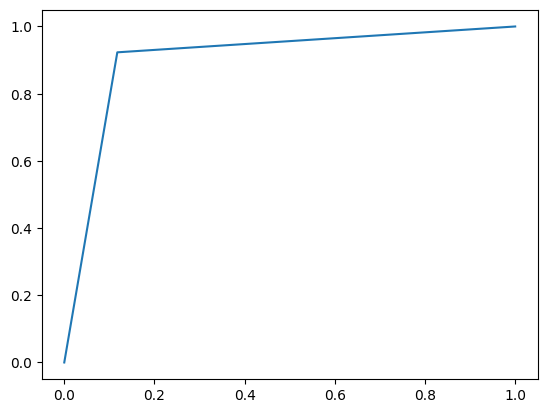

In [46]:
plt.plot(fpr,tpr)

In [47]:
auc(fpr,tpr)

np.float64(0.9027149321266968)

In [48]:
y_proba  = logistic.predict_proba(X_test)

In [49]:
y_proba

array([[0.22698856, 0.77301144],
       [0.9151639 , 0.0848361 ],
       [0.07515565, 0.92484435],
       [0.67978992, 0.32021008],
       [0.90216974, 0.09783026],
       [0.33221919, 0.66778081],
       [0.04166027, 0.95833973],
       [0.73417703, 0.26582297],
       [0.92262757, 0.07737243],
       [0.95894487, 0.04105513],
       [0.84650923, 0.15349077],
       [0.41943062, 0.58056938],
       [0.71602005, 0.28397995],
       [0.23996921, 0.76003079],
       [0.12892763, 0.87107237],
       [0.32626675, 0.67373325],
       [0.08424655, 0.91575345],
       [0.81883037, 0.18116963],
       [0.01307121, 0.98692879],
       [0.04172444, 0.95827556],
       [0.28118049, 0.71881951],
       [0.54154552, 0.45845448],
       [0.03516929, 0.96483071],
       [0.61624557, 0.38375443],
       [0.13975776, 0.86024224],
       [0.834519  , 0.165481  ],
       [0.77127218, 0.22872782],
       [0.69072188, 0.30927812],
       [0.59641427, 0.40358573],
       [0.82114859, 0.17885141]])

In [50]:
np.sort(y_proba[:,1])

array([0.04105513, 0.07737243, 0.0848361 , 0.09783026, 0.15349077,
       0.165481  , 0.17885141, 0.18116963, 0.22872782, 0.26582297,
       0.28397995, 0.30927812, 0.32021008, 0.38375443, 0.40358573,
       0.45845448, 0.58056938, 0.66778081, 0.67373325, 0.71881951,
       0.76003079, 0.77301144, 0.86024224, 0.87107237, 0.91575345,
       0.92484435, 0.95827556, 0.95833973, 0.96483071, 0.98692879])

In [51]:
fpr,tpr,thresholds=roc_curve(y_test,y_proba[:,1])
display(fpr,tpr,thresholds)

array([0.        , 0.        , 0.        , 0.05882353, 0.05882353,
       0.11764706, 0.11764706, 1.        ])

array([0.        , 0.07692308, 0.69230769, 0.69230769, 0.76923077,
       0.76923077, 1.        , 1.        ])

array([       inf, 0.98692879, 0.77301144, 0.76003079, 0.71881951,
       0.67373325, 0.45845448, 0.04105513])

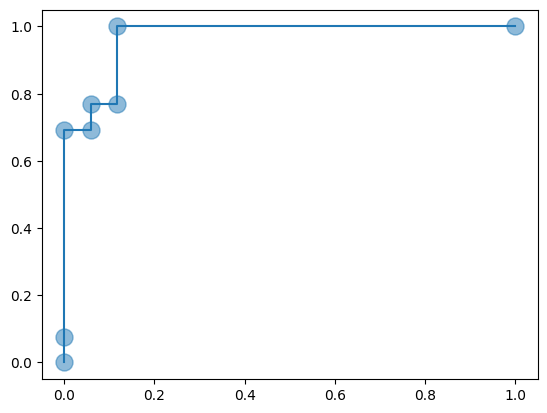

In [52]:
plt.plot(fpr,tpr)
plt.scatter(fpr,tpr,s=150,alpha=0.5)

In [53]:
auc(fpr,tpr)

np.float64(0.9683257918552036)

In [54]:
from sklearn.model_selection import StratifiedKFold

In [55]:
skf=StratifiedKFold(n_splits=6,shuffle=False)

<>:30: SyntaxWarning: invalid escape sequence '\p'
<>:30: SyntaxWarning: invalid escape sequence '\p'
C:\Users\wangx\AppData\Local\Temp\ipykernel_20544\2149543749.py:30: SyntaxWarning: invalid escape sequence '\p'
  plt.plot(fpr_mean,tpr_mean,label=f'Mean ROC (AUC:{auc_mean:.2f}$\pm${auc_std:.2f})',c='b')


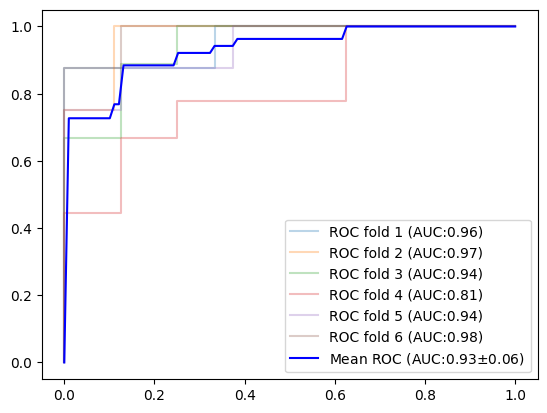

In [58]:
fpr_mean=np.linspace(0,1,100) #作为FPR的横轴坐标
tpr_means=[] #存储每折的TPR插值结果
aucs=[] #存储每折的AUC值
n=0
for train,test in skf.split(X,target):
    X_train=X[train]
    y_train=target[train]
    X_test=X[test]
    y_test=target[test]
    logistic=LogisticRegression()
    logistic.fit(X_train,y_train)
    #获取测试集的概率预测
    y_proba=logistic.predict_proba(X_test)
    #提取正类的概率
    fpr,tpr,thresholds=roc_curve(y_test,y_proba[:,1])

    tpr_mean=np.interp(fpr_mean,fpr,tpr)
    tpr_means.append(tpr_mean)

    auc_=auc(fpr,tpr)
    aucs.append(auc_)
    n+=1
    plt.plot(fpr,tpr,label=f'ROC fold {n} (AUC:{auc_:.2f})',alpha=0.3)
#计算并绘制平均ROC曲线
tpr_mean=np.array(tpr_means).mean(axis=0)
tpr_mean[0]=0
tpr_mean[-1]=1
auc_mean=auc(fpr_mean,tpr_mean)
#计算各折AUC的标准差
auc_std=np.array(aucs).std()
plt.plot(fpr_mean,tpr_mean,label=f'Mean ROC (AUC:{auc_mean:.2f}$\pm${auc_std:.2f})',c='b')
plt.legend()

In [59]:
from sklearn.svm import SVC

<>:31: SyntaxWarning: invalid escape sequence '\p'
<>:31: SyntaxWarning: invalid escape sequence '\p'
C:\Users\wangx\AppData\Local\Temp\ipykernel_20544\3407598924.py:31: SyntaxWarning: invalid escape sequence '\p'
  plt.plot(fpr_mean,tpr_mean,label=f'Mean ROC (AUC:{auc_mean:.2f}$\pm${auc_std:.2f})',c='b')


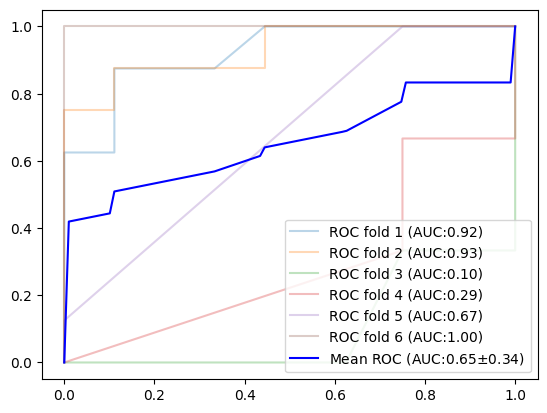

In [60]:
fpr_mean=np.linspace(0,1,100) #作为FPR的横轴坐标
tpr_means=[] #存储每折的TPR插值结果
aucs=[] #存储每折的AUC值
n=0
for train,test in skf.split(X,target):
    X_train=X[train]
    y_train=target[train]
    X_test=X[test]
    y_test=target[test]
    svc=SVC(probability=True)
    svc.fit(X_train,y_train)
    #获取测试集的概率预测
    y_proba=svc.predict_proba(X_test)
    #提取正类的概率
    fpr,tpr,thresholds=roc_curve(y_test,y_proba[:,1])

    tpr_mean=np.interp(fpr_mean,fpr,tpr)
    tpr_means.append(tpr_mean)

    auc_=auc(fpr,tpr)
    aucs.append(auc_)
    n+=1
    plt.plot(fpr,tpr,label=f'ROC fold {n} (AUC:{auc_:.2f})',alpha=0.3)
#计算并绘制平均ROC曲线
tpr_mean=np.array(tpr_means).mean(axis=0)
tpr_mean[0]=0
tpr_mean[-1]=1
auc_mean=auc(fpr_mean,tpr_mean)
#计算各折AUC的标准差
auc_std=np.array(aucs).std()
plt.plot(fpr_mean,tpr_mean,label=f'Mean ROC (AUC:{auc_mean:.2f}$\pm${auc_std:.2f})',c='b')
plt.legend()

In [61]:
x1=np.linspace(0,2*np.pi,20)

In [62]:
y1=np.sin(x1)

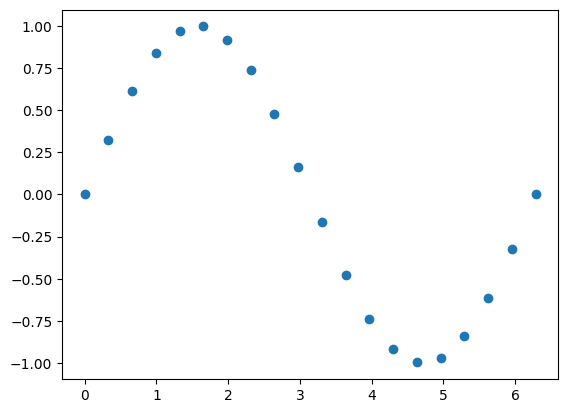

In [63]:
plt.scatter(x1,y1)

In [64]:
x2=np.linspace(0,2*np.pi,50)

In [65]:
y2=np.interp(x2,x1,y1)

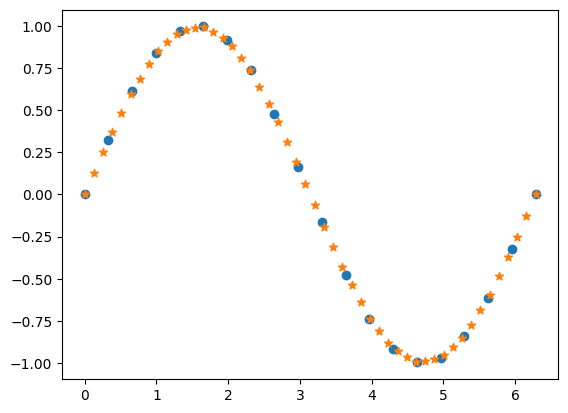

In [66]:
plt.scatter(x1,y1)
plt.scatter(x2,y2,marker='*')